In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets
from tensorflow.keras import layers

In [5]:
def mymodel2(input_shape, num_classes):
    inputs= layers.Input(shape=input_shape)

    #cnn의 역할: feature extraction, feature map을 만들어주는 역할 
    net = layers.Conv2D(32,3,1,padding='SAME')(inputs)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(32,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Flatten()(net) #2D->1D
    net = layers.Dense(512)(net)
    net = layers.Activation('relu')(net)
    net = layers.Dropout(0.25)(net)
#     net = layers.Dense(128)(net)
#     net = layers.Activation('relu')(net)
    net = layers.Dense(num_classes)(net)
    net = layers.Activation('softmax')(net)

    model = tf.keras.Model(inputs=inputs, outputs= net, name='test')
    return model

In [6]:
input_shape=(28,28,1)
num_classes=10
model =mymodel2(input_shape, num_classes)

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
train_x_4d=train_x[...,tf.newaxis]/255
train_x_4d.shape

(60000, 28, 28, 1)

In [9]:
np.max(train_x_4d), np.min(train_x_4d)

(1.0, 0.0)

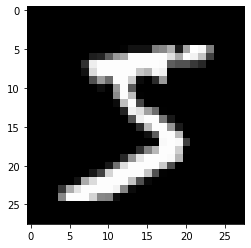

In [10]:
#plt.imshow(np.squeeze(train_x_4d[0]),'gray')
plt.imshow(train_x_4d[0].reshape(28,28), 'gray')
plt.show()

In [11]:
num_epoch = 1
batch_size= 32#메모리 오류나면 숫자를 줄여보기
hist = model.fit(train_x_4d, train_y, batch_size= batch_size, shuffle=True, epochs=num_epoch)

1875/1875 [==============================] - 343s 183ms/step - loss: 0.1314 - accuracy: 0.9590


In [12]:
hist.history

{'loss': [0.1314302533864975], 'accuracy': [0.9589833617210388]}

https://keras.io/api/optimizers/

## learining rate(lr) scheduler, check point 사용

In [14]:
import math

epoch =11

if epoch <10:
    lr= 0.001
else:
    lr=0.001* math.exp(0.1*(10-epoch)) 
    
print(epoch, lr)

11 0.0009048374180359595


In [16]:
import math

for epoch in range(20):

    if epoch <10:
        lr= 0.001
    else:
        lr=0.001* math.exp(0.1*(10-epoch)) 

    print(epoch, lr)

0 0.001
1 0.001
2 0.001
3 0.001
4 0.001
5 0.001
6 0.001
7 0.001
8 0.001
9 0.001
10 0.001
11 0.0009048374180359595
12 0.0008187307530779819
13 0.0007408182206817179
14 0.0006703200460356394
15 0.0006065306597126335
16 0.0005488116360940264
17 0.0004965853037914095
18 0.0004493289641172216
19 0.00040656965974059914


In [24]:
import math

def scheduler(epoch):

    if epoch <10:
        return 0.001
    else:
        return 0.001* math.exp(0.1*(10-epoch))
        

In [25]:
learning_rate_scheduler=tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

In [29]:
save_path='checkpoints'
checkpoint= tf.keras.callbacks.ModelCheckpoint(save_path, monitor='accuary',verbose=1, save_best_only=True, mode='max')
#checkpoint= tf.keras.callbacks.ModelCheckpoint(save_path, monitor='loss',verbose=1, save_best_only=True, mode='min')

In [30]:
num_epoch = 11
batch_size= 32 #메모리 오류나면 숫자를 줄여보기
hist = model.fit(train_x_4d, train_y, batch_size= batch_size, shuffle=True, epochs=num_epoch, callbacks=[learning_rate_scheduler, checkpoint])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/11
1875/1875 [==============================] - 342s 183ms/step - loss: 0.0262 - accuracy: 0.9920

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
Epoch 2/11
1875/1875 [==============================] - 326s 174ms/step - loss: 0.0223 - accuracy: 0.9930

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
Epoch 3/11
1875/1875 [==============================] - 338s 181ms/step - loss: 0.0210 - accuracy: 0.9934

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001.
Epoch 4/11
1875/1875 [==============================] - 335s 178ms/step - loss: 0.0181 - accuracy: 0.9945

Epoch 00005: LearningRateScheduler reducing learning rate to 0.001.
Epoch 5/11
1875/1875 [==============================] - 279s 149ms/step - loss: 0.0168 - accuracy: 0.9947

Epoch 00006: LearningRateScheduler reducing learning rate to 0.001.
Epoch 6/11
1875/1875 [==============================] - 

In [31]:
test_img = test_x[0]
pred = model.predict(test_img.reshape(1,28,28,1))
pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [32]:
np.argmax(pred)

7

In [33]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

In [34]:
test_x_4d = test_x[..., tf.newaxis]
test_x_4d.shape

(10000, 28, 28, 1)

In [35]:
test_x_4d= test_x_4d/255

In [36]:
model.evaluate(test_x_4d, test_y, batch_size=batch_size)

313/313 [==============================] - 10s 31ms/step - loss: 0.0256 - accuracy: 0.99330s - loss: 0.0257 - accuracy: 0.


[0.025614874437451363, 0.9933000206947327]

In [37]:
pred = model.predict(test_x_4d)

In [38]:
pred.shape

(10000, 10)

In [39]:
pred[0]

array([2.5266674e-18, 1.0957884e-12, 1.7081738e-12, 3.0448772e-15,
       1.3341837e-13, 5.8303143e-19, 3.4921037e-21, 1.0000000e+00,
       1.1955793e-15, 1.6212382e-12], dtype=float32)

In [40]:
result=np.argmax(pred, axis=1) #axis:10개중에 어느게 크냐 인덱스 반환

In [41]:
result.shape, result

((10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [42]:
test_y.shape, test_y

((10000,), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [44]:
count=0
for index in range(len(test_y)):
    if result[index]!=test_y[index]:
        print('index, result, test_y', index, result[index], test_y[index])
        count +=1
print(count, 'err rate=',count/len(test_y))

index, result, test_y 199 3 2
index, result, test_y 321 7 2
index, result, test_y 445 0 6
index, result, test_y 659 1 2
index, result, test_y 674 3 5
index, result, test_y 740 9 4
index, result, test_y 924 7 2
index, result, test_y 947 9 8
index, result, test_y 1014 0 6
index, result, test_y 1182 5 6
index, result, test_y 1247 5 9
index, result, test_y 1260 1 7
index, result, test_y 1393 3 5
index, result, test_y 1459 3 2
index, result, test_y 1654 3 2
index, result, test_y 1878 3 8
index, result, test_y 1901 4 9
index, result, test_y 2093 0 8
index, result, test_y 2118 4 6
index, result, test_y 2129 8 9
index, result, test_y 2130 9 4
index, result, test_y 2135 1 6
index, result, test_y 2182 3 1
index, result, test_y 2293 4 9
index, result, test_y 2406 4 9
index, result, test_y 2447 9 4
index, result, test_y 2462 0 2
index, result, test_y 2597 3 5
index, result, test_y 2654 1 6
index, result, test_y 2771 9 4
index, result, test_y 2939 5 9
index, result, test_y 2953 5 3
index, result, t

In [45]:
accuaray= 1-count/len(test_y)
accuaray

0.9933

0 6


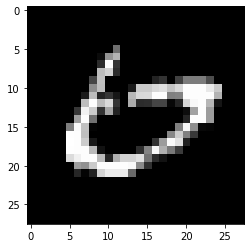

In [46]:
index=445
print(result[index], test_y[index])
plt.imshow(test_x[index].reshape(28,28), 'gray')
plt.show()